# Overview

This is the final script of the final project for Civic Analytics at NYC CUSP. It includes the following sections:

- Data Ingestion and Processing
- Modelling
- Data Exporting
- Analysis and Visualization

Models:
- K-Means
- Linear Regression
- Collaborative Filtering

Contributor
- Ian Xiao
- Ben Steers
- Te Du

---

## Data Ingestion and Processing

In [1]:
# Import
import numpy as np
import pandas as pd
from datetime import datetime

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

import matplotlib as plt
import matplotlib.style as style
style.use('fivethirtyeight')
%pylab inline

from IPython.display import HTML, display as d

pd.set_option('display.max_columns', 500)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Ingest data from project github
# Please see Data Processing script for detailed steps (TO BE UPLOADED)
url = "https://raw.githubusercontent.com/td928/CAUI_team1_Final_Project/master/merged-w-latlon.csv"
df = pd.read_csv(url)
df.head()

,BBL,EUI_2013,floorArea_2013,EUI_2014,floorArea_2014,EUI_2015,floorArea_2015,EUI_2016,floorArea_2016,Occupancy,TYPE_2016,water_intensity,naturalgas_use,Metered Areas (Energy),Metered Areas (Water),naturalgas_intensity,Borough,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,XCoord,YCoord,ZipCode,Address,Longitude,Latitude
0,1011860091,60.9,63121.0,70.9,58266.0,68.6,58266.0,68.3,58266.0,100.0,Multifamily Housing,26.45,67417.0,Whole Building,Whole Building,1.157056,MN,6641,58266,0,58266,0,0,12.0,25,25,1910,989141.0,225102.0,10024.0,316 WEST 79 STREET,-73.982338,40.784528
1,1000167501,64.9,199141.0,74.2,220821.0,77.0,220821.0,76.2,220821.0,100.0,Multifamily Housing,52.01,10441275.8,Whole Building,Whole Building,47.283890,MN,16951,179174,1092,177488,0,1092,25.0,238,239,1985,979290.0,197895.0,10280.0,377 RECTOR PLACE,-74.017891,40.709851
2,1000167502,71.5,150667.0,74.8,150855.0,41.1,150855.0,74.2,150855.0,100.0,Multifamily Housing,44.60,2332818.2,Whole Building,Whole Building,15.463977,MN,27838,123284,11136,112148,0,0,15.0,133,133,1986,979379.0,197988.0,10280.0,350 ALBANY STREET,-74.017570,40.710107
3,1000167504,74.6,112312.0,77.7,91774.0,73.3,91774.0,71.7,91774.0,100.0,Multifamily Housing,39.22,4395045.3,Whole Building,Not Available,47.889874,MN,16108,72913,4295,68618,0,4295,9.0,107,110,1986,979576.0,197918.0,10280.0,300 ALBANY STREET,-74.016859,40.709915
4,1000167505,116.7,235366.0,106.2,257092.0,106.7,257092.0,101.7,257092.0,100.0,Multifamily Housing,56.40,16783196.3,Whole Building,Not Available,65.280897,MN,23910,203837,1177,202660,1177,0,26.0,246,247,1987,979243.0,197613.0,10280.0,380 RECTOR PLACE,-74.018060,40.709077


In [3]:
df.dtypes

BBL                         int64
EUI_2013                  float64
floorArea_2013            float64
EUI_2014                  float64
floorArea_2014            float64
EUI_2015                  float64
floorArea_2015            float64
EUI_2016                  float64
floorArea_2016            float64
Occupancy                 float64
TYPE_2016                  object
water_intensity           float64
naturalgas_use            float64
Metered Areas (Energy)     object
Metered Areas  (Water)     object
naturalgas_intensity      float64
Borough                    object
LotArea                     int64
BldgArea                    int64
ComArea                     int64
ResArea                     int64
OfficeArea                  int64
RetailArea                  int64
NumFloors                 float64
UnitsRes                    int64
UnitsTotal                  int64
YearBuilt                   int64
XCoord                    float64
YCoord                    float64
ZipCode       

In [4]:
# Create a Age feature based on Built Year
df["age"] = datetime.datetime.now().year - df['YearBuilt']

# Create Average EUI of 2013, 2014, and 2015
df["avgEUI"] = df[['EUI_2013', 'EUI_2014', 'EUI_2015']].mean(axis=1)

df.head(10)

,BBL,EUI_2013,floorArea_2013,EUI_2014,floorArea_2014,EUI_2015,floorArea_2015,EUI_2016,floorArea_2016,Occupancy,TYPE_2016,water_intensity,naturalgas_use,Metered Areas (Energy),Metered Areas (Water),naturalgas_intensity,Borough,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,XCoord,YCoord,ZipCode,Address,Longitude,Latitude,age,avgEUI
0,1011860091,60.9,63121.0,70.9,58266.0,68.6,58266.0,68.3,58266.0,100.0,Multifamily Housing,26.45,67417.0,Whole Building,Whole Building,1.157056,MN,6641,58266,0,58266,0,0,12.0,25,25,1910,989141.0,225102.0,10024.0,316 WEST 79 STREET,-73.982338,40.784528,107,66.800000
1,1000167501,64.9,199141.0,74.2,220821.0,77.0,220821.0,76.2,220821.0,100.0,Multifamily Housing,52.01,10441275.8,Whole Building,Whole Building,47.283890,MN,16951,179174,1092,177488,0,1092,25.0,238,239,1985,979290.0,197895.0,10280.0,377 RECTOR PLACE,-74.017891,40.709851,32,72.033333
2,1000167502,71.5,150667.0,74.8,150855.0,41.1,150855.0,74.2,150855.0,100.0,Multifamily Housing,44.60,2332818.2,Whole Building,Whole Building,15.463977,MN,27838,123284,11136,112148,0,0,15.0,133,133,1986,979379.0,197988.0,10280.0,350 ALBANY STREET,-74.017570,40.710107,31,62.466667
3,1000167504,74.6,112312.0,77.7,91774.0,73.3,91774.0,71.7,91774.0,100.0,Multifamily Housing,39.22,4395045.3,Whole Building,Not Available,47.889874,MN,16108,72913,4295,68618,0,4295,9.0,107,110,1986,979576.0,197918.0,10280.0,300 ALBANY STREET,-74.016859,40.709915,31,75.200000
4,1000167505,116.7,235366.0,106.2,257092.0,106.7,257092.0,101.7,257092.0,100.0,Multifamily Housing,56.40,16783196.3,Whole Building,Not Available,65.280897,MN,23910,203837,1177,202660,1177,0,26.0,246,247,1987,979243.0,197613.0,10280.0,380 RECTOR PLACE,-74.018060,40.709077,30,109.866667
5,1000167506,77.3,111398.0,80.2,106631.0,80.3,106631.0,77.2,106631.0,100.0,Multifamily Housing,41.26,5756290.8,Whole Building,Whole Building,53.983277,MN,15000,81667,502,81165,0,502,9.0,121,122,1985,979576.0,197463.0,10280.0,280 RECTOR PLACE,-74.016859,40.708666,32,79.266667
6,1000167507,56.6,163863.0,62.0,129176.0,62.1,129176.0,61.9,129176.0,100.0,Multifamily Housing,43.29,6951841.3,Whole Building,Whole Building,53.816818,MN,25978,106271,3168,103103,0,3168,9.0,153,154,1986,979385.0,197552.0,10280.0,300 RECTOR PLACE,-74.017548,40.708910,31,60.233333
7,1000167508,91.6,517639.0,93.1,590974.0,93.3,590974.0,86.9,590974.0,100.0,Multifamily Housing,48.08,31758766.1,Whole Building,Whole Building,53.739701,MN,37248,428589,4750,423839,1640,3110,44.0,545,547,1987,979703.0,197392.0,10280.0,200 RECTOR PLACE,-74.016401,40.708471,30,92.666667
8,1000167509,160.0,225262.0,108.1,237270.0,89.0,237270.0,100.0,237270.0,100.0,Multifamily Housing,69.24,11837980.8,Whole Building,Not Available,49.892447,MN,45203,194762,32279,162483,0,28464,9.0,182,184,1988,979227.0,197334.0,10280.0,21 SOUTH END AVENUE,-74.018117,40.708312,29,119.033333
9,1000167510,66.9,296200.0,74.7,348953.0,80.3,348953.0,78.3,348953.0,100.0,Multifamily Housing,40.76,15207412.8,Whole Building,Whole Building,43.580118,MN,24167,251929,7464,244465,6885,0,28.0,293,294,1988,979649.0,197083.0,10280.0,99 BATTERY PLACE,-74.016595,40.707623,29,73.966667


In [5]:
print("--- Number of Missing Value in Each Column ---")
d(df.isnull().sum())
len_before = len(df)

# Drop rows with any missing value
model_df = df.dropna()
len(model_df) - len_before, 'dropped'

--- Number of Missing Value in Each Column ---


BBL                       0
EUI_2013                  0
floorArea_2013            0
EUI_2014                  0
floorArea_2014            0
EUI_2015                  0
floorArea_2015            0
EUI_2016                  0
floorArea_2016            0
Occupancy                 0
TYPE_2016                 0
water_intensity           0
naturalgas_use            0
Metered Areas (Energy)    0
Metered Areas  (Water)    0
naturalgas_intensity      0
Borough                   0
LotArea                   0
BldgArea                  0
ComArea                   0
ResArea                   0
OfficeArea                0
RetailArea                0
NumFloors                 0
UnitsRes                  0
UnitsTotal                0
YearBuilt                 0
XCoord                    0
YCoord                    0
ZipCode                   0
Address                   0
Longitude                 0
Latitude                  0
age                       0
avgEUI                    0
dtype: int64

(0, 'dropped')

In [6]:
# Select only Multi-family buildings for Modelling 

model_df = model_df[(model_df.TYPE_2016 == 'Multifamily Housing')]
print("Number of Records in the Modelling Dataset: {}".format(model_df.shape[0]))

Number of Records in the Modelling Dataset: 3538


--- 

## Modelling
- Calculate EER, WER, NER using K-Means
- Calculate EER, WER, NER using Linear Regression

EER Calculation:
- In K-Means, EER = actual EUI 2016 / K-mean Group EUI 2016.
- In Linear Regression, EER = actual EUI 2016 / Predicted EUI 2016

In [7]:
model_df.dtypes

BBL                         int64
EUI_2013                  float64
floorArea_2013            float64
EUI_2014                  float64
floorArea_2014            float64
EUI_2015                  float64
floorArea_2015            float64
EUI_2016                  float64
floorArea_2016            float64
Occupancy                 float64
TYPE_2016                  object
water_intensity           float64
naturalgas_use            float64
Metered Areas (Energy)     object
Metered Areas  (Water)     object
naturalgas_intensity      float64
Borough                    object
LotArea                     int64
BldgArea                    int64
ComArea                     int64
ResArea                     int64
OfficeArea                  int64
RetailArea                  int64
NumFloors                 float64
UnitsRes                    int64
UnitsTotal                  int64
YearBuilt                   int64
XCoord                    float64
YCoord                    float64
ZipCode       

In [8]:
# Perform K-Means

kmean_features = ['age', 'Occupancy', 'Latitude', 'Longitude', 'BldgArea', 'UnitsTotal', 'avgEUI']
init = 100
seed = 123

kmeans = KMeans(n_clusters=3, random_state = seed, n_init = init).fit(model_df[kmean_features])
model_df['km_group'] = kmeans.predict(model_df[kmean_features])

# @IAN updat

In [9]:
model_df.groupby('km_group').size()

km_group
0    2775
1     646
2     117
dtype: int64

# @IAN ~need to calculate stats for water and natural gas as well~

In [10]:
# Calculate k-mean based EUI stats from Iteration 1
km_stats = pd.pivot_table(model_df, index= 'km_group', values= ["EUI_2016", "water_intensity", "naturalgas_intensity"],
                               aggfunc= [np.mean, np.median, min, max, np.std, np.size])

# Rename Columns by Joining with "_"
km_stats.columns = ["Group_"+"_".join((i,j)) for i,j in km_stats.columns]
km_stats = km_stats.reset_index()

km_stats

,km_group,Group_mean_EUI_2016,Group_mean_naturalgas_intensity,Group_mean_water_intensity,Group_median_EUI_2016,Group_median_naturalgas_intensity,Group_median_water_intensity,Group_min_EUI_2016,Group_min_naturalgas_intensity,Group_min_water_intensity,Group_max_EUI_2016,Group_max_naturalgas_intensity,Group_max_water_intensity,Group_std_EUI_2016,Group_std_naturalgas_intensity,Group_std_water_intensity,Group_size_EUI_2016,Group_size_naturalgas_intensity,Group_size_water_intensity
0,0,119.430847,50.164380,90.435564,82.1,55.978827,52.10,4.6,0.000000,0.00,37168.2,1239.036255,52143.20,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0
1,1,180.765170,40.579067,51.208653,76.8,44.574002,48.03,0.4,0.067944,0.00,67937.0,501.815338,432.01,2670.220394,35.493561,29.400921,646.0,646.0,646.0
2,2,91.277778,66.260843,54.368547,79.9,61.427373,50.86,59.4,0.000000,21.99,188.6,138.119872,118.91,25.479292,36.722369,20.456162,117.0,117.0,117.0


In [11]:
# Merge with Original Modelling Dataset
km_df = model_df.merge(km_stats, how="left", left_on="km_group", right_on="km_group")

In [12]:
km_df.sample(10)

,BBL,EUI_2013,floorArea_2013,EUI_2014,floorArea_2014,EUI_2015,floorArea_2015,EUI_2016,floorArea_2016,Occupancy,TYPE_2016,water_intensity,naturalgas_use,Metered Areas (Energy),Metered Areas (Water),naturalgas_intensity,Borough,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,XCoord,YCoord,ZipCode,Address,Longitude,Latitude,age,avgEUI,km_group,Group_mean_EUI_2016,Group_mean_naturalgas_intensity,Group_mean_water_intensity,Group_median_EUI_2016,Group_median_naturalgas_intensity,Group_median_water_intensity,Group_min_EUI_2016,Group_min_naturalgas_intensity,Group_min_water_intensity,Group_max_EUI_2016,Group_max_naturalgas_intensity,Group_max_water_intensity,Group_std_EUI_2016,Group_std_naturalgas_intensity,Group_std_water_intensity,Group_size_EUI_2016,Group_size_naturalgas_intensity,Group_size_water_intensity
2568,4012640047,73.9,109498.0,82.0,106800.0,100.3,106800.0,79.5,106800.0,100.0,Multifamily Housing,53.66,5766000.2,Whole Building,Whole Building,53.988766,QN,37000,106800,800,106000,800,0,6.0,132,135,1951,1014946.0,213386.0,11372.0,34-21 77 STREET,-73.889209,40.752318,66,85.400000,0,119.430847,50.164380,90.435564,82.1,55.978827,52.10,4.6,0.000000,0.0,37168.2,1239.036255,52143.20,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0
2498,3052400017,69.4,68000.0,70.7,68000.0,68.4,68000.0,74.7,68000.0,100.0,Multifamily Housing,47.81,4249264.8,Whole Building,Whole Building,62.489188,BK,15000,68000,13000,55000,2000,0,6.0,54,57,1931,995805.0,170180.0,11230.0,1170 OCEAN AVENUE,-73.958369,40.633774,86,69.500000,0,119.430847,50.164380,90.435564,82.1,55.978827,52.10,4.6,0.000000,0.0,37168.2,1239.036255,52143.20,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0
2441,3050800060,90.4,87951.0,266.2,87951.0,106.0,87951.0,90.5,87951.0,100.0,Multifamily Housing,123.95,5658200.1,Whole Building,Whole Building,64.333550,BK,20608,87951,0,87951,0,0,6.0,64,64,1931,994925.0,176315.0,11226.0,500 OCEAN AVENUE,-73.961530,40.650614,86,154.200000,0,119.430847,50.164380,90.435564,82.1,55.978827,52.10,4.6,0.000000,0.0,37168.2,1239.036255,52143.20,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0
250,1006087501,107.0,170857.0,107.9,186887.0,81.5,186887.0,103.5,186887.0,100.0,Multifamily Housing,61.02,415153.3,Whole Building,Whole Building,2.221413,MN,15435,183323,21727,161596,0,9261,19.0,214,223,1961,984208.0,207916.0,10011.0,175 WEST 12 STREET,-74.000152,40.737358,56,98.800000,1,180.765170,40.579067,51.208653,76.8,44.574002,48.03,0.4,0.067944,0.0,67937.0,501.815338,432.01,2670.220394,35.493561,29.400921,646.0,646.0,646.0
1907,3049060001,76.4,121695.0,140.0,115900.0,96.2,115900.0,91.4,115900.0,100.0,Multifamily Housing,61.08,6532000.0,Whole Building,Not Available,56.358930,BK,30777,115900,0,115900,0,0,6.0,126,126,1957,999713.0,175652.0,11203.0,3500 SNYDER AVENUE,-73.944276,40.648787,60,104.200000,0,119.430847,50.164380,90.435564,82.1,55.978827,52.10,4.6,0.000000,0.0,37168.2,1239.036255,52143.20,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0
3270,1008910039,106.1,96100.0,119.3,96102.0,163.6,96102.0,157.5,96102.0,100.0,Multifamily Housing,80.22,199254.1,Whole Building,Not Available,2.073361,MN,9875,96102,3500,92602,0,3500,14.0,130,132,1955,990398.0,211325.0,10016.0,165 EAST 35 STREET,-73.977812,40.746713,62,129.666667,0,119.430847,50.164380,90.435564,82.1,55.978827,52.10,4.6,0.000000,0.0,37168.2,1239.036255,52143.20,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0
2941,2033430126,91.4,75820.0,105.7,75821.0,103.3,75821.0,102.7,75821.0,100.0,Multifamily Housing,104.07,399070.0,Whole Building,Whole Building,5.263318,BX,20125,75821,0,75821,0,0,6.0,73,73,1959,1018653.0,258870.0,10467.0,3320 RESERVOIR OVAL EAST,-73.875597,40.877146,58,100.133333,0,119.430847,50.164380,90.435564,82.1,55.978827,52.10,4.6,0.000000,0.0,37168.2,1239.036255,52143.20,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0
2013,2042930023,58.6,85195.0,67.4,77450.0,75.9,77450.0,72.1,77450.0,100.0,Multifamily Housing,44.82,1

In [13]:
km_df['EER_km'] = km_df['EUI_2016'] / km_df['Group_mean_EUI_2016']
km_df['WER_km'] = km_df['water_intensity'] / km_df['Group_mean_water_intensity']
km_df['NER_km'] = km_df['naturalgas_intensity'] / km_df['Group_mean_naturalgas_intensity']
km_df[['EER_km', 'WER_km', 'NER_km']].describe()

,EER_km,WER_km,NER_km
count,3538.000000,3538.000000,3538.000000
mean,1.000000,1.000000,1.000000
std,9.906415,10.004762,0.814399
min,0.002213,0.000000,0.000000
25%,0.519129,0.435669,0.311670
50%,0.656447,0.652785,1.110758
75%,0.800852,0.972322,1.422211
max,375.830144,576.578480,24.699523


In [14]:
km_df.sample(10)

,BBL,EUI_2013,floorArea_2013,EUI_2014,floorArea_2014,EUI_2015,floorArea_2015,EUI_2016,floorArea_2016,Occupancy,TYPE_2016,water_intensity,naturalgas_use,Metered Areas (Energy),Metered Areas (Water),naturalgas_intensity,Borough,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,XCoord,YCoord,ZipCode,Address,Longitude,Latitude,age,avgEUI,km_group,Group_mean_EUI_2016,Group_mean_naturalgas_intensity,Group_mean_water_intensity,Group_median_EUI_2016,Group_median_naturalgas_intensity,Group_median_water_intensity,Group_min_EUI_2016,Group_min_naturalgas_intensity,Group_min_water_intensity,Group_max_EUI_2016,Group_max_naturalgas_intensity,Group_max_water_intensity,Group_std_EUI_2016,Group_std_naturalgas_intensity,Group_std_water_intensity,Group_size_EUI_2016,Group_size_naturalgas_intensity,Group_size_water_intensity,EER_km,WER_km,NER_km
1471,1022430090,75.4,57553.0,64.0,107106.0,81.1,107106.0,58.8,107106.0,100.0,Multifamily Housing,68.39,703890.9,Whole Building,Whole Building,6.571909,MN,25000,107106,0,107106,0,0,6.0,228,228,1924,1006723.0,256554.0,10034.0,221 SEAMAN AVENUE,-73.918744,40.870827,93,73.500000,0,119.430847,50.164380,90.435564,82.1,55.978827,52.10,4.6,0.000000,0.00,37168.2,1239.036255,52143.20,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0,0.492335,0.756229,0.131007
913,1005000005,41.4,64300.0,52.6,54300.0,57.2,54300.0,56.0,54300.0,100.0,Multifamily Housing,37.48,2114275.1,Whole Building,Whole Building,38.936926,MN,10000,54300,9400,44900,0,4700,6.0,32,36,1900,984148.0,203302.0,10012.0,108 WOOSTER STREET,-74.000368,40.724694,117,50.400000,0,119.430847,50.164380,90.435564,82.1,55.978827,52.10,4.6,0.000000,0.00,37168.2,1239.036255,52143.20,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0,0.468891,0.414439,0.776187
3280,4050130038,107.8,49330.0,126.9,113522.0,94.2,113522.0,93.6,113522.0,100.0,Multifamily Housing,47.46,9218326.8,Whole Building,Whole Building,81.202999,QN,52611,113522,0,113522,0,0,6.0,173,173,1973,1033057.0,217241.0,11354.0,37-14 PARSONS BOULEVARD,-73.823814,40.762818,44,109.633333,0,119.430847,50.164380,90.435564,82.1,55.978827,52.10,4.6,0.000000,0.00,37168.2,1239.036255,52143.20,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0,0.783717,0.524794,1.618738
649,1012170029,68.4,123217.0,78.3,123217.0,83.5,123217.0,78.8,123217.0,100.0,Multifamily Housing,35.64,324400.0,Whole Building,Whole Building,2.632754,MN,10066,123217,5000,118217,0,5000,16.0,123,130,1929,991869.0,225967.0,10024.0,105 WEST 86 STREET,-73.972487,40.786900,88,76.733333,0,119.430847,50.164380,90.435564,82.1,55.978827,52.10,4.6,0.000000,0.00,37168.2,1239.036255,52143.20,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0,0.659796,0.394093,0.052483
1950,2036230001,106.3,1214880.0,88.6,1069698.0,82.4,1069698.0,74.7,534849.0,100.0,Multifamily Housing,64.72,66772227.1,Whole Building,Not Available,124.843137,BX,227345,534849,0,534849,0,0,19.0,484,484,1969,1017753.0,237981.0,10473.0,823 COLGATE AVENUE,-73.878955,40.819815,48,92.433333,2,91.277778,66.260843,54.368547,79.9,61.427373,50.86,59.4,0.000000,21.99,188.6,138.119872,118.91,25.479292,36.722369,20.456162,117.0,117.0,117.0,0.818381,1.190394,1.884116
1767,3022977502,70.8,90260.0,62.3,94200.0,81.9,94200.0,75.8,94200.0,100.0,Multifamily Housing,42.11,3280490.9,Whole Building,Whole Building,34.824744,BK,29442,98447,11223,85893,0,0,6.0,86,93,2007,996320.0,201681.0,11249.0,125 NORTH 10 STREET,-73.956457,40.720236,10,71.666667,0,119.430847,50.164380,90.435564,82.1,55.978827,52.10,4.6,0.000000,0.00,37168.2,1239.036255,52143.20,1030.090827,40.597252,1021.338733,2775.0,2775.0,2775.0,0.634677,0.465635,0.694213
1939,2036230001,94.8,267426.0,88.3,1069698.0,82.4,1069698.0,74.7,534849.0,100.0,Multifamily Housing,64.72,66772227.1,Whole Building,Not Available,124.843137,BX,227345,534849,0,534849,0,0,19.0,484,484,1969,1017753.0,237981.0,10473.0,823 COLGATE AVENUE,-73.878955,40.819815,48,88.500000,2,91.277778,66.260843,54.368547,79.9,61.427373,50.86,59.4,0.

# LINEAR REGRESSION

input dataset: use model_df

output dataset: name it lr_df with on the following columns:
- BBL
- Pred_EER
- EER_lr = (EUI_2016/ Pred_EER) <- not needed based on our discussion, but let's just do it in case we need it

In [15]:
lr_years = [2013, 2014, 2015, 2016]
lr_features = ['age', 'Latitude', 'Longitude', 'BldgArea', 'UnitsTotal']

lr_df = model_df[['BBL']].copy()

# Train model for electricity
# Use EUI for all years
X = pd.concat([model_df[lr_features] for _ in lr_years]) # Duplicate len(years) times
y = pd.concat([model_df['EUI_{}'.format(y)] for y in lr_years]) # Get EUI for each year
lrmodel = LinearRegression().fit(X, y)

# Store predictions
lr_df['Pred_EUI_lr'] = lrmodel.predict(model_df[lr_features])
lr_df['EER_lr'] = model_df['EUI_2016'] / lr_df['Pred_EUI_lr']

# Train model for water
lrmodel = LinearRegression().fit(model_df[lr_features], model_df['water_intensity'])

# Store predictions
lr_df['Pred_WUI_lr'] = lrmodel.predict(model_df[lr_features])
lr_df['WER_lr'] = model_df['water_intensity'] / lr_df['Pred_WUI_lr']

# Train model for natural gas
lrmodel = LinearRegression().fit(model_df[lr_features], model_df['naturalgas_intensity'])

# Store predictions
lr_df['Pred_NUI_lr'] = lrmodel.predict(model_df[lr_features])
lr_df['NER_lr'] = model_df['naturalgas_intensity'] / lr_df['Pred_NUI_lr']

lr_df.head()

,BBL,Pred_EUI_lr,EER_lr,Pred_WUI_lr,WER_lr,Pred_NUI_lr,NER_lr
0,1011860091,118.101796,0.578315,65.218895,0.405557,39.393148,0.029372
1,1000167501,157.387020,0.484157,36.699431,1.417188,49.438675,0.956415
2,1000167502,140.929320,0.526505,31.887616,1.398662,48.740912,0.317269
3,1000167504,150.952137,0.474985,40.670656,0.964332,48.983661,0.977670
4,1000167505,151.619315,0.670759,31.528965,1.788831,49.478796,1.319371


---

## Data Integration and Export

- Integrate datasets from K-Means and Linear Regression
- Compute Average EER of K-Means and Linear Regression
- Export CSV to the same folder

In [16]:
km_df.columns

Index([u'BBL', u'EUI_2013', u'floorArea_2013', u'EUI_2014', u'floorArea_2014',
       u'EUI_2015', u'floorArea_2015', u'EUI_2016', u'floorArea_2016',
       u'Occupancy', u'TYPE_2016', u'water_intensity', u'naturalgas_use',
       u'Metered Areas (Energy)', u'Metered Areas  (Water)',
       u'naturalgas_intensity', u'Borough', u'LotArea', u'BldgArea',
       u'ComArea', u'ResArea', u'OfficeArea', u'RetailArea', u'NumFloors',
       u'UnitsRes', u'UnitsTotal', u'YearBuilt', u'XCoord', u'YCoord',
       u'ZipCode', u'Address', u'Longitude', u'Latitude', u'age', u'avgEUI',
       u'km_group', u'Group_mean_EUI_2016', u'Group_mean_naturalgas_intensity',
       u'Group_mean_water_intensity', u'Group_median_EUI_2016',
       u'Group_median_naturalgas_intensity', u'Group_median_water_intensity',
       u'Group_min_EUI_2016', u'Group_min_naturalgas_intensity',
       u'Group_min_water_intensity', u'Group_max_EUI_2016',
       u'Group_max_naturalgas_intensity', u'Group_max_water_intensity',
    

In [17]:
# Compute average EER, WER, NER
final_df = km_df.merge(lr_df, how="left", on="BBL", suffixes=('_km', '_lr'))
final_df['avgEER'] = final_df['EUI_2016'] / final_df[['Pred_EUI_lr', 'Group_mean_EUI_2016']].mean(axis=1)
final_df['avgWER'] = final_df['EUI_2016'] / final_df[['Pred_WUI_lr', 'Group_mean_water_intensity']].mean(axis=1)
final_df['avgNER'] = final_df['EUI_2016'] / final_df[['Pred_NUI_lr', 'Group_mean_naturalgas_intensity']].mean(axis=1)

final_df[[
    'BBL', 'Address', 'Longitude', 'Latitude', 'age', 'UnitsRes', 'BldgArea',
    'avgEER', 'EER_km', 'EER_lr', 'EUI_2016', 'Group_mean_EUI_2016', 'Pred_EUI_lr',
    'avgWER', 'WER_km', 'WER_lr', 'water_intensity', 'Group_mean_water_intensity', 'Pred_WUI_lr', 
    'avgNER', 'NER_km', 'NER_lr', 'naturalgas_intensity', 'Group_mean_naturalgas_intensity', 'Pred_NUI_lr',
]].head()

,BBL,Address,Longitude,Latitude,age,UnitsRes,BldgArea,avgEER,EER_km,EER_lr,EUI_2016,Group_mean_EUI_2016,Pred_EUI_lr,avgWER,WER_km,WER_lr,water_intensity,Group_mean_water_intensity,Pred_WUI_lr,avgNER,NER_km,NER_lr,naturalgas_intensity,Group_mean_naturalgas_intensity,Pred_NUI_lr
0,1011860091,316 WEST 79 STREET,-73.982338,40.784528,107,25,58266,0.575079,0.571879,0.578315,68.3,119.430847,118.101796,0.877585,0.292473,0.405557,26.45,90.435564,65.218895,1.525277,0.023065,0.029372,1.157056,50.164380,39.393148
1,1000167501,377 RECTOR PLACE,-74.017891,40.709851,32,238,179174,0.450685,0.421541,0.484157,76.2,180.765170,157.387020,1.733629,1.015649,1.417188,52.01,51.208653,36.699431,1.693000,1.165229,0.956415,47.283890,40.579067,49.438675
2,1000167502,350 ALBANY STREET,-74.017570,40.710107,31,133,123284,0.569980,0.621280,0.526505,74.2,119.430847,140.929320,1.213180,0.493169,1.398662,44.60,90.435564,31.887616,1.500425,0.308266,0.317269,15.463977,50.164380,48.740912
3,1000167504,300 ALBANY STREET,-74.016859,40.709915,31,107,72913,0.530359,0.600347,0.474985,71.7,119.430847,150.952137,1.093770,0.433679,0.964332,39.22,90.435564,40.670656,1.446322,0.954659,0.977670,47.889874,50.164380,48.983661
4,1000167505,380 RECTOR PLACE,-74.018060,40.709077,30,246,203837,0.611942,0.562608,0.670759,101.7,180.765170,151.619315,2.458374,1.101376,1.788831,56.40,51.208653,31.528965,2.258548,1.608733,1.319371,65.280897,40.579067,49.478796


In [20]:
final_df.shape

(9718, 66)

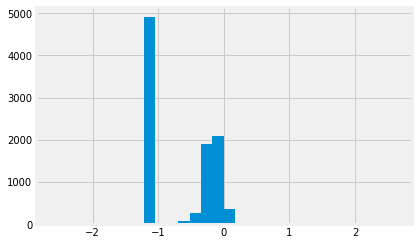

In [18]:
np.log10(final_df['avgEER']).replace(-np.inf, np.nan).hist(bins=30);

In [19]:
final_df.to_csv("final_df.csv")